# Credit Card Customer Segmentation

## Problem Statement

### Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help


### Objective

To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

### Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).

### Data Dictionary

Sl_No: Primary key of the records

Customer Key: Customer identification number

Average Credit Limit: Average credit limit of each customer for all credit cards

Total credit cards: Total number of credit cards possessed by the customer

Total visits bank: Total number of visits that the customer made (yearly) personally to the bank

Total visits online: Total number of visits or online logins made by the customer (yearly)

Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
data = pd.read_csv('/content/Credit Card Customer Data.csv')

## Overview of the Dataset

### Checking the shape of the dataset

In [5]:
data.shape

(660, 7)

In [15]:
# checking shape of the data
print(f"There are {'660'} rows and {'7'} columns.")

There are 660 rows and 7 columns.


### Displaying few rows of the dataset

In [7]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


### Checking the data types of the columns for the dataset

In [8]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


### Creating a copy of original data

In [9]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [12]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [13]:
# checking for missing values in the data
df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [16]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


## Exploratory Data Analysis

### Univariate analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`Customer Key`**

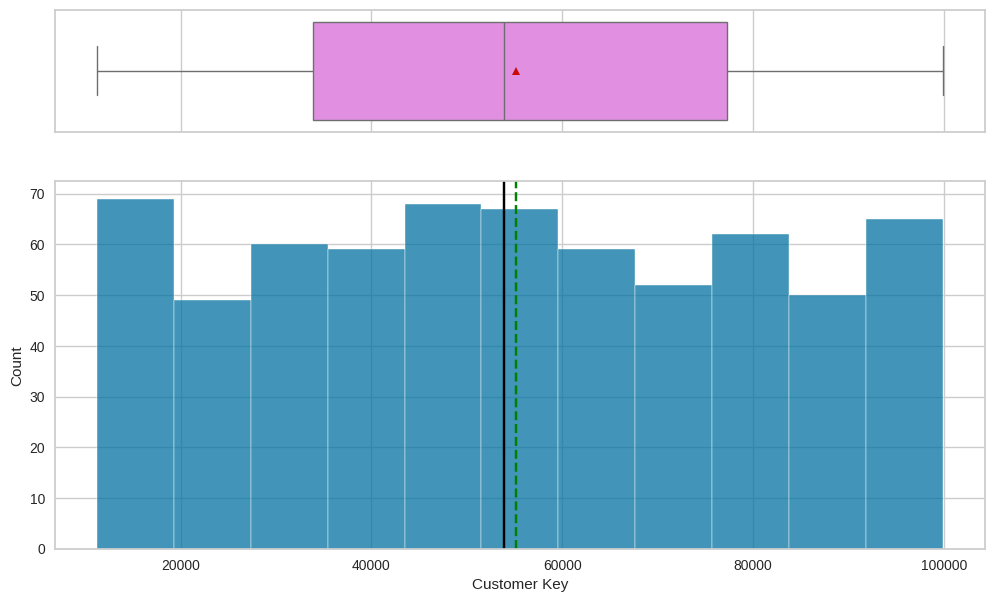

In [19]:
histogram_boxplot(df, 'Customer Key')

**`Avg_Credit_Limit`**

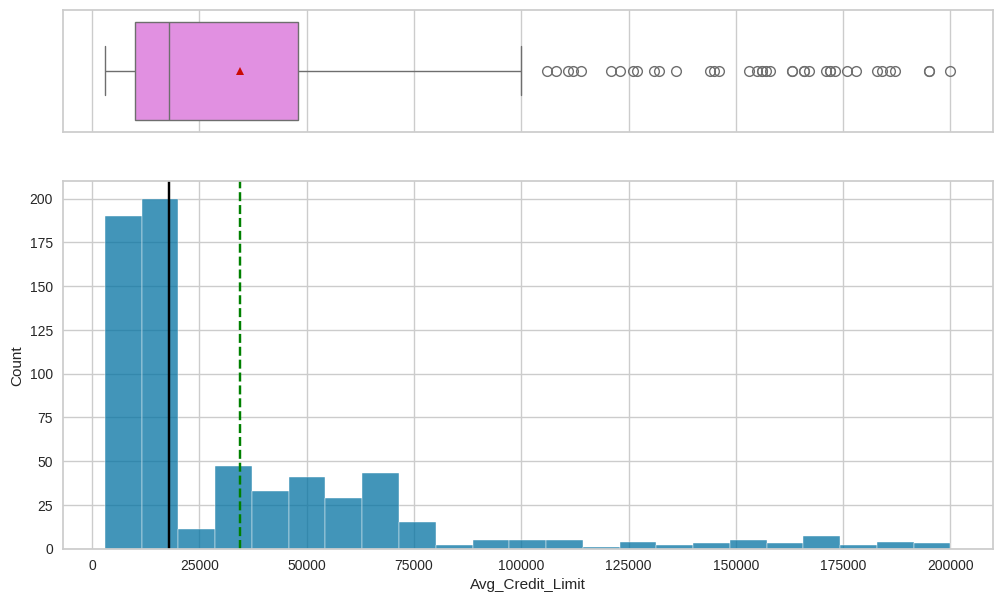

In [20]:
histogram_boxplot(df, 'Avg_Credit_Limit')

**`Total_Credit_Cards`**

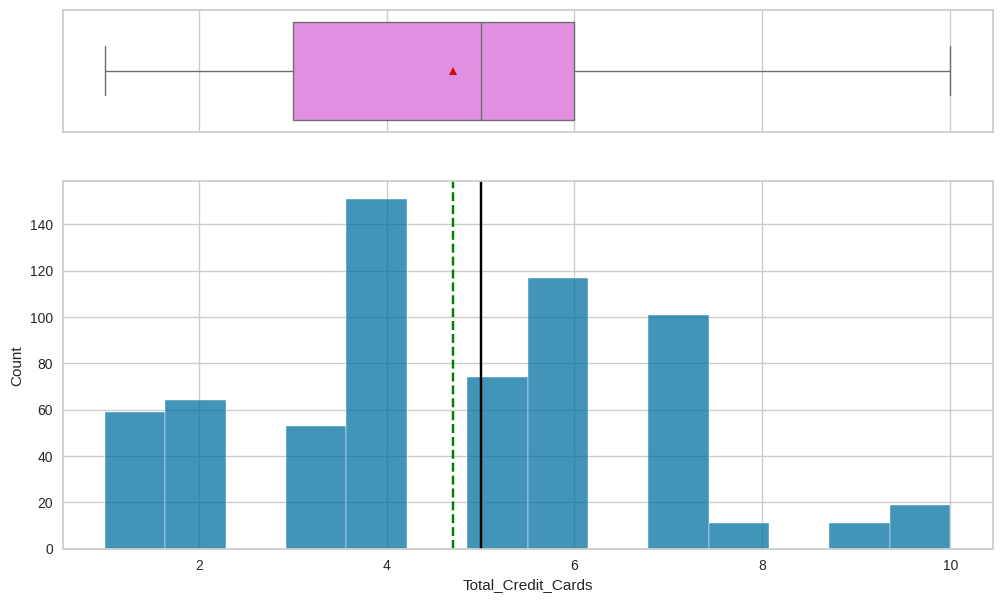

In [21]:
histogram_boxplot(df, 'Total_Credit_Cards')

**`Total_visits_bank`**

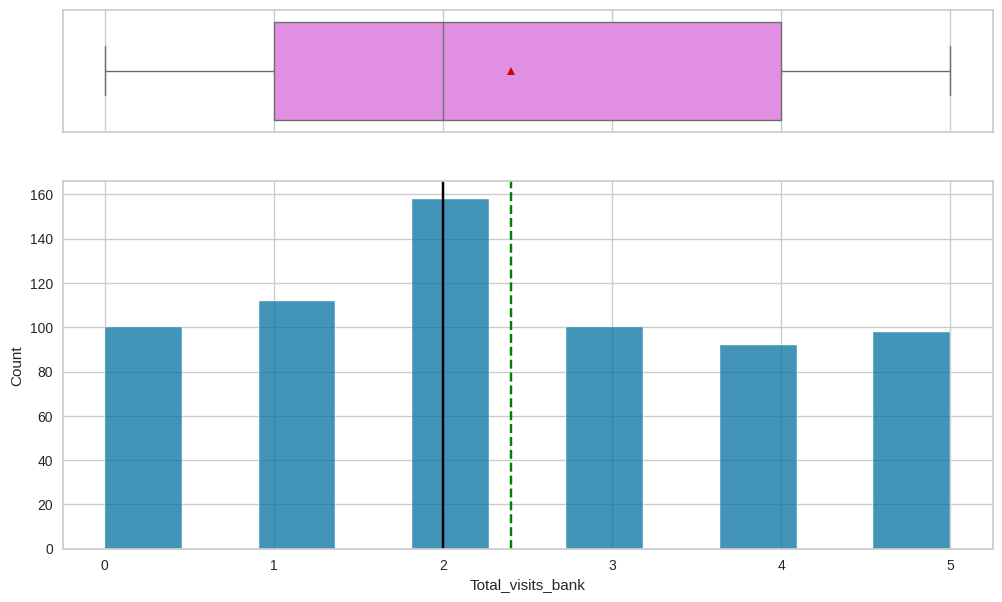

In [22]:
histogram_boxplot(df, 'Total_visits_bank')

**`Total_visits_online`**

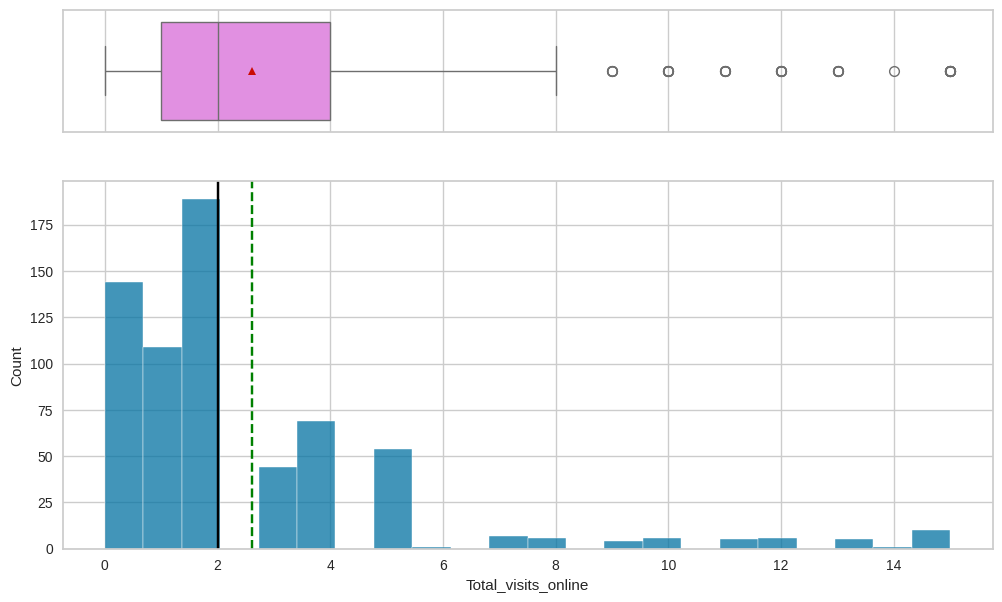

In [23]:
histogram_boxplot(df, 'Total_visits_online')

**`Total_calls_made`**

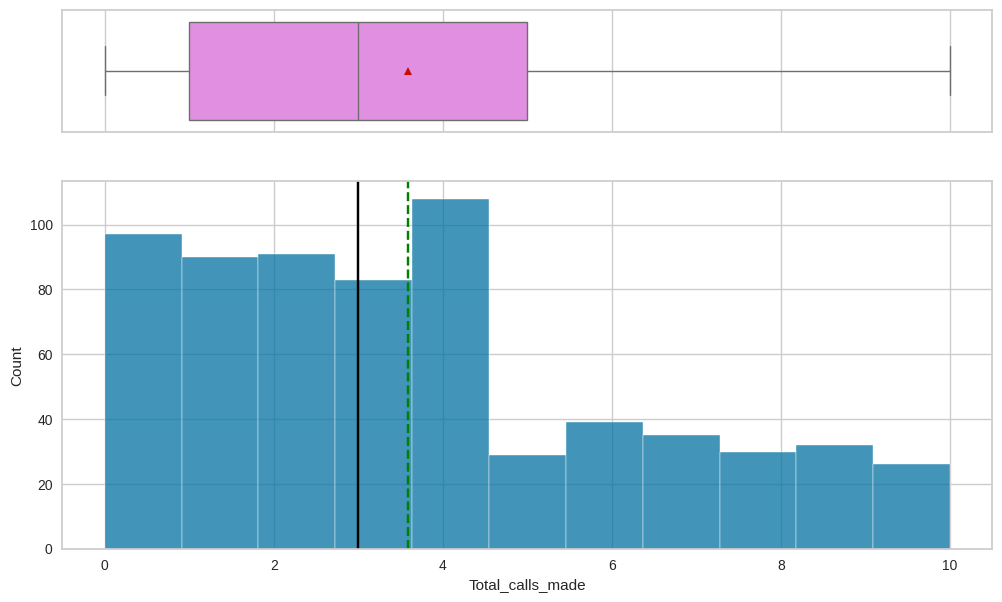

In [24]:
histogram_boxplot(df, 'Total_calls_made')

### Bivariate Analysis

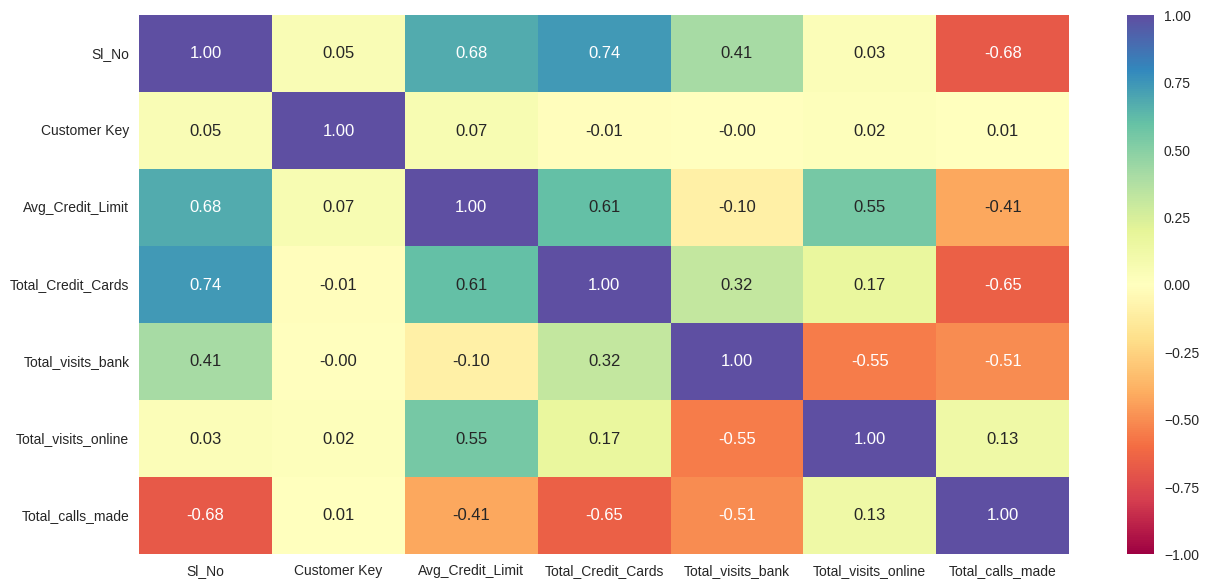

In [25]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

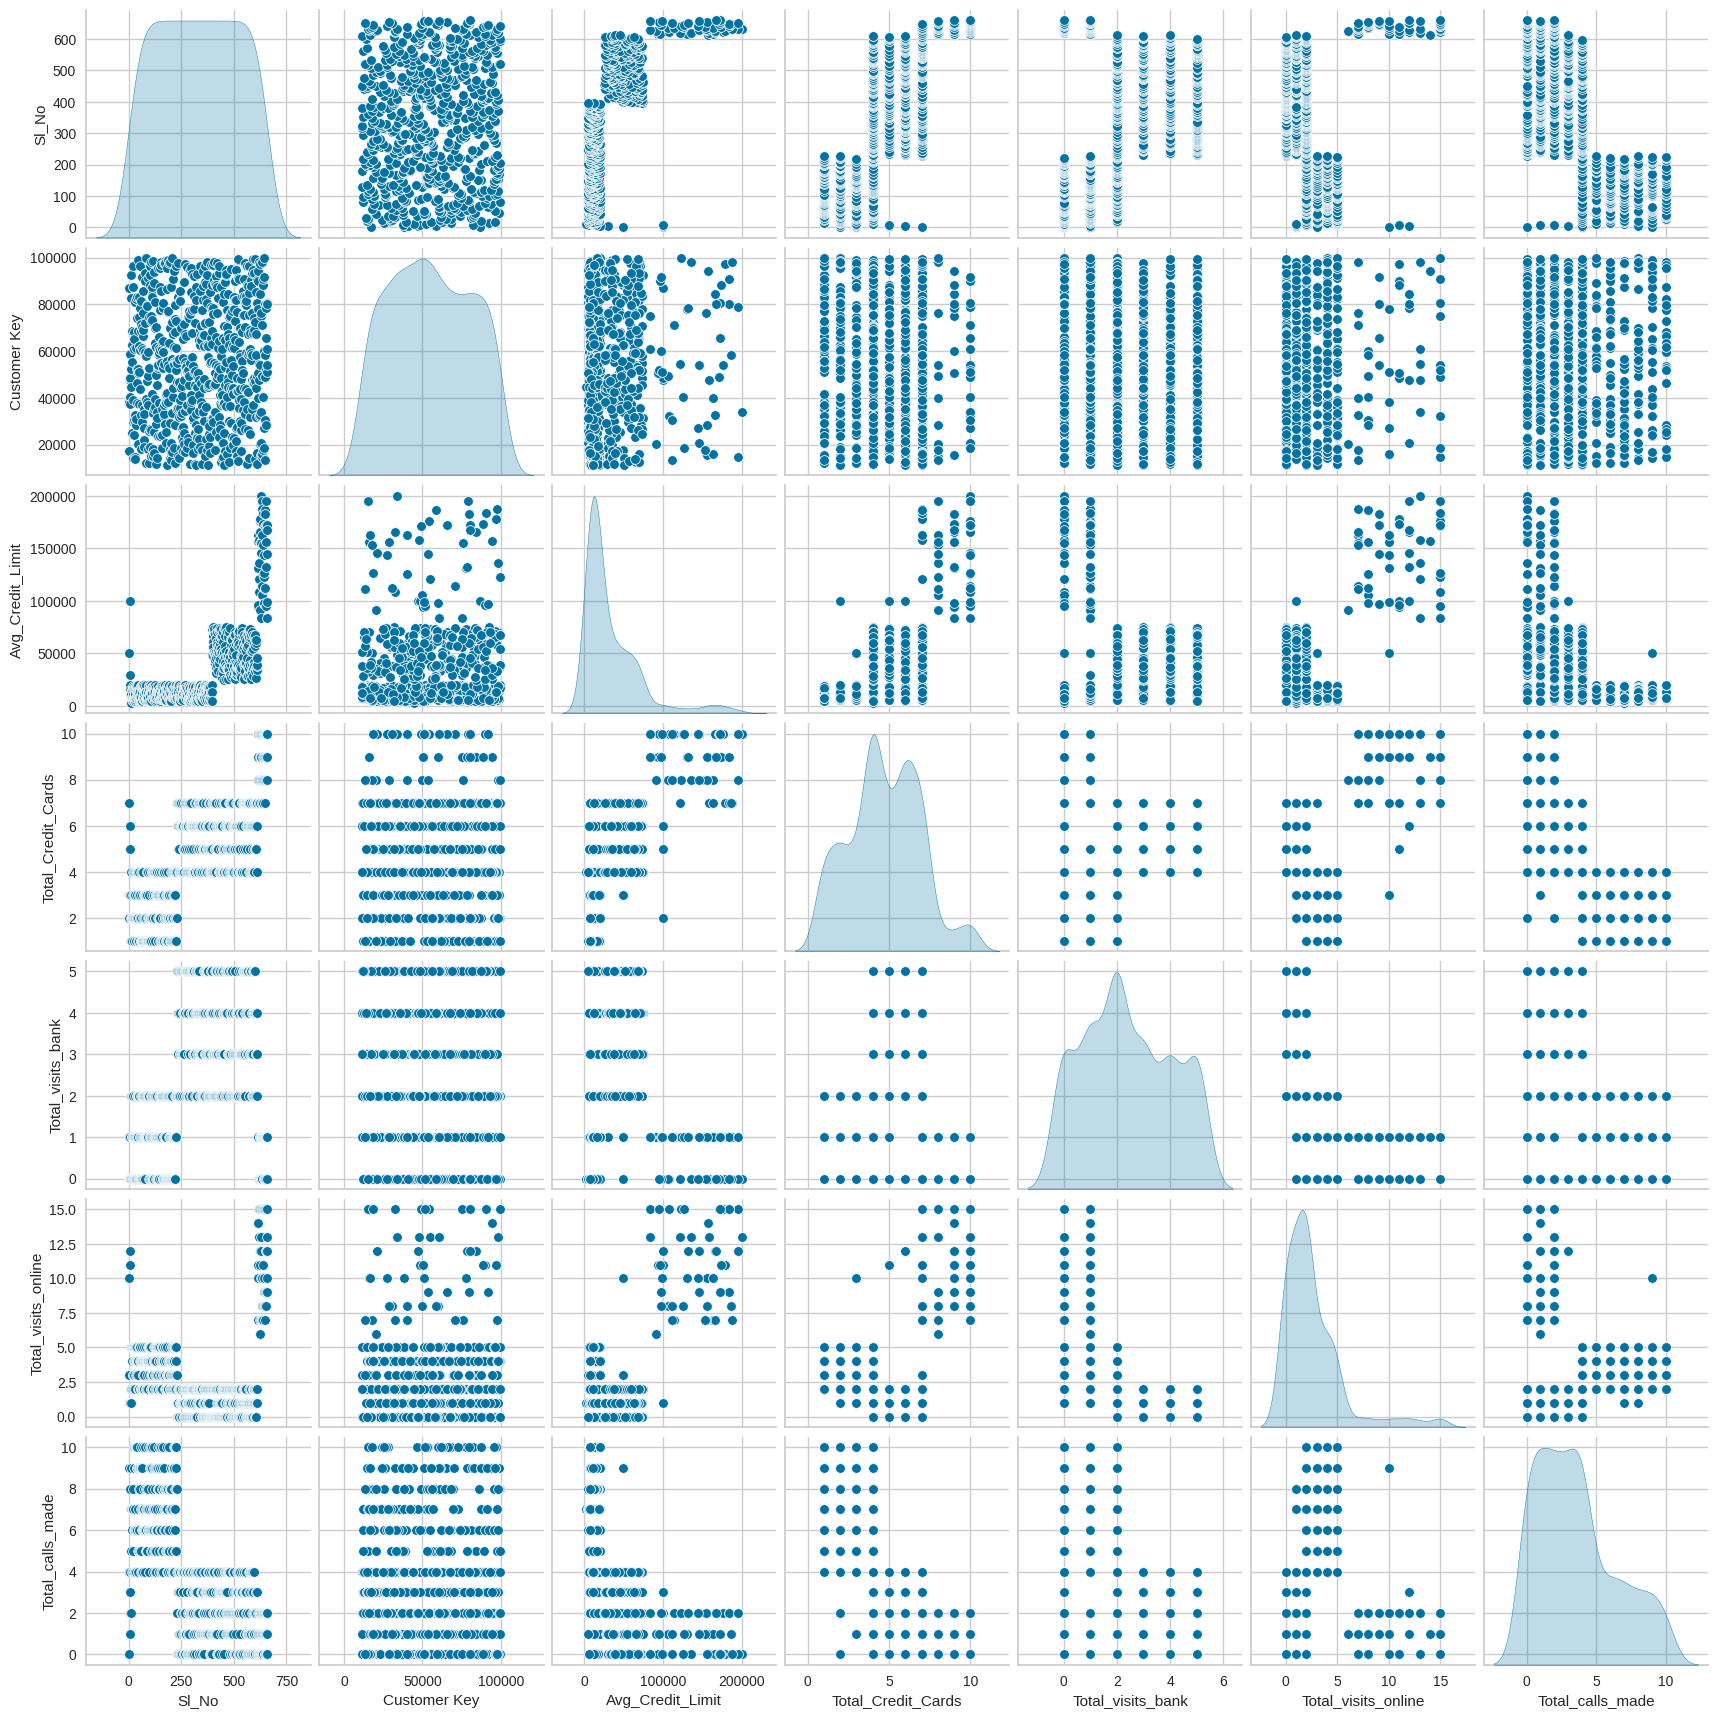

In [26]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

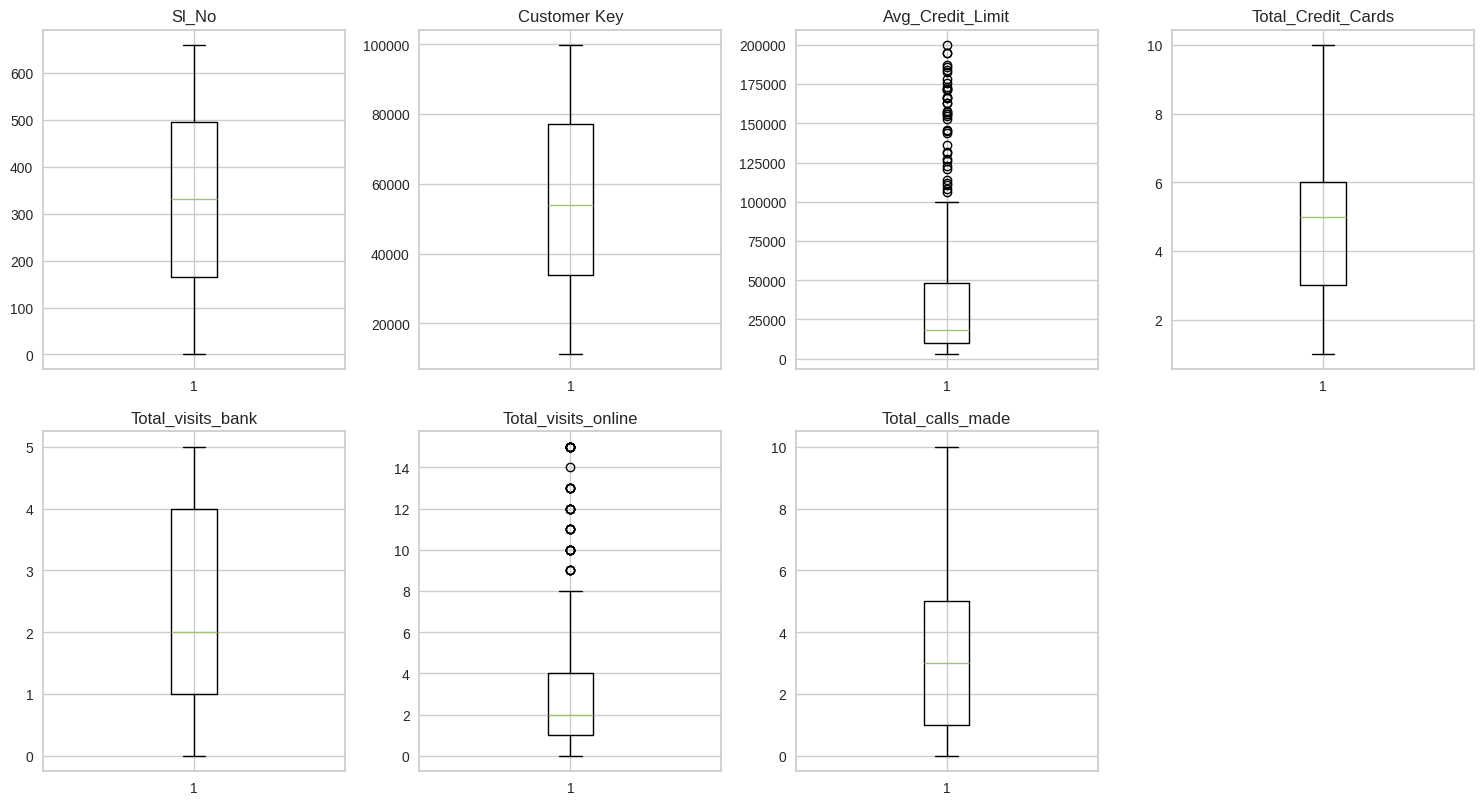

In [27]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Scaling

- Let's scale the data before we proceed with clustering.

In [28]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df.drop(["Sl_No", "Customer Key"], axis=1)),
    columns=df.drop(["Sl_No", "Customer Key"], axis=1).columns,
)
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [29]:
# Scaling the data before clustering
scaler = StandardScaler()

# Selecting numerical columns
num_col = df.select_dtypes(include=['number']).columns  # Extract numerical columns

subset = df[num_col].copy()  # Copy only numerical data
subset_scaled = scaler.fit_transform(subset)  # Apply scaling

In [30]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

### Checking Elbow Plot

In [31]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.4605025916536993
Number of Clusters: 2 	Average Distortion: 2.180216921019843
Number of Clusters: 3 	Average Distortion: 1.5915434451950843
Number of Clusters: 4 	Average Distortion: 1.4576085931270464
Number of Clusters: 5 	Average Distortion: 1.3678543736925128
Number of Clusters: 6 	Average Distortion: 1.3482210745155185
Number of Clusters: 7 	Average Distortion: 1.2864593395142838
Number of Clusters: 8 	Average Distortion: 1.2247890831233854
Number of Clusters: 9 	Average Distortion: 1.1972136337521853
Number of Clusters: 10 	Average Distortion: 1.1724927131716691
Number of Clusters: 11 	Average Distortion: 1.1519339118590797
Number of Clusters: 12 	Average Distortion: 1.1316946482488028
Number of Clusters: 13 	Average Distortion: 1.119469632599319
Number of Clusters: 14 	Average Distortion: 1.1025440723540956


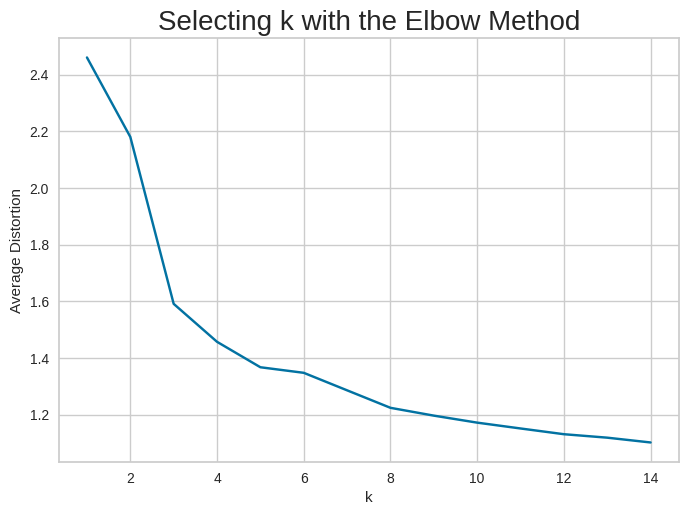

In [32]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

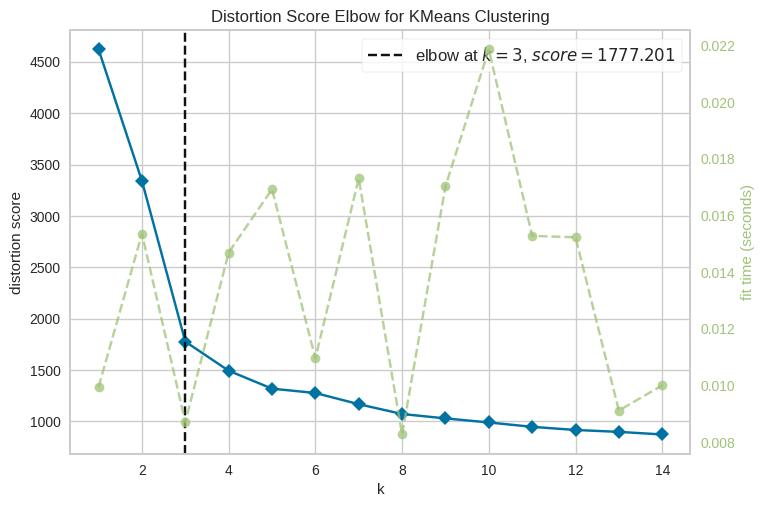

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.49522120315704116)
For n_clusters = 3, the silhouette score is 0.44394092525170764)
For n_clusters = 4, the silhouette score is 0.32322590765742937)
For n_clusters = 5, the silhouette score is 0.2665350914306843)
For n_clusters = 6, the silhouette score is 0.2440686331268522)
For n_clusters = 7, the silhouette score is 0.22419997124871827)
For n_clusters = 8, the silhouette score is 0.23024008911301988)
For n_clusters = 9, the silhouette score is 0.22137594166676244)
For n_clusters = 10, the silhouette score is 0.2221625311589056)
For n_clusters = 11, the silhouette score is 0.2032209490038744)
For n_clusters = 12, the silhouette score is 0.1855094474926542)
For n_clusters = 13, the silhouette score is 0.17705989029974387)
For n_clusters = 14, the silhouette score is 0.17302345624214485)


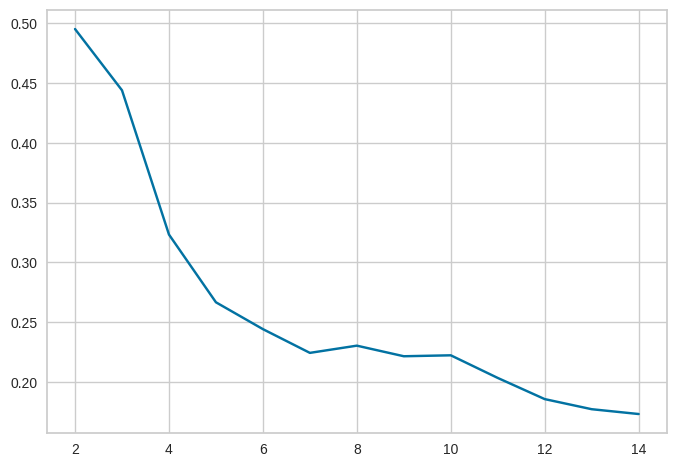

In [34]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

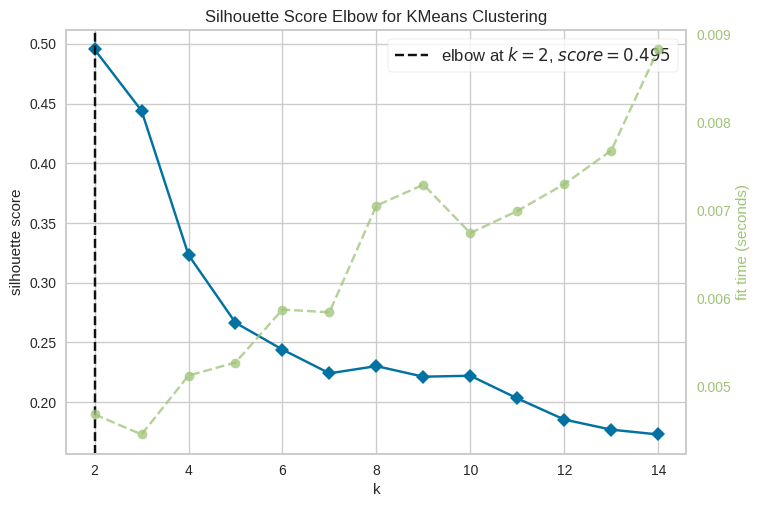

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [35]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

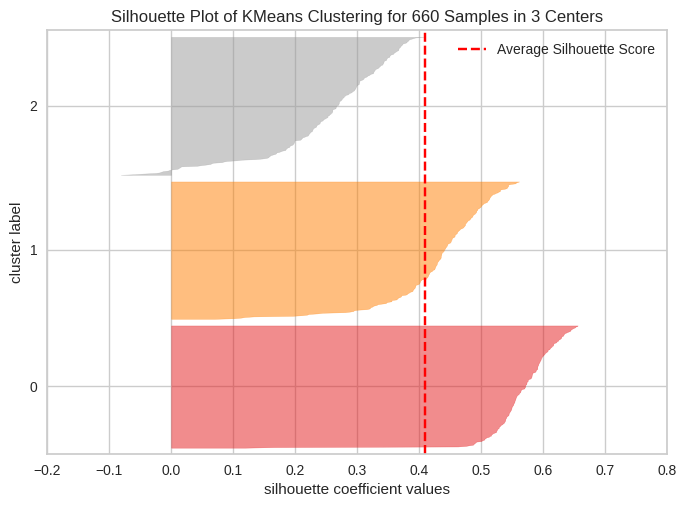

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

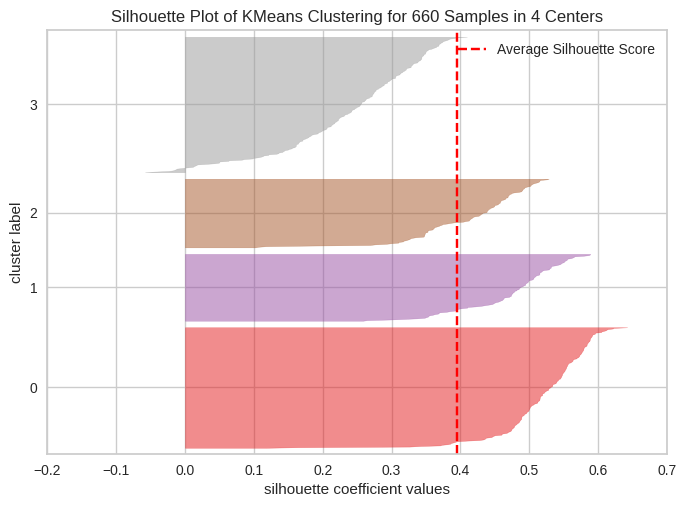

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

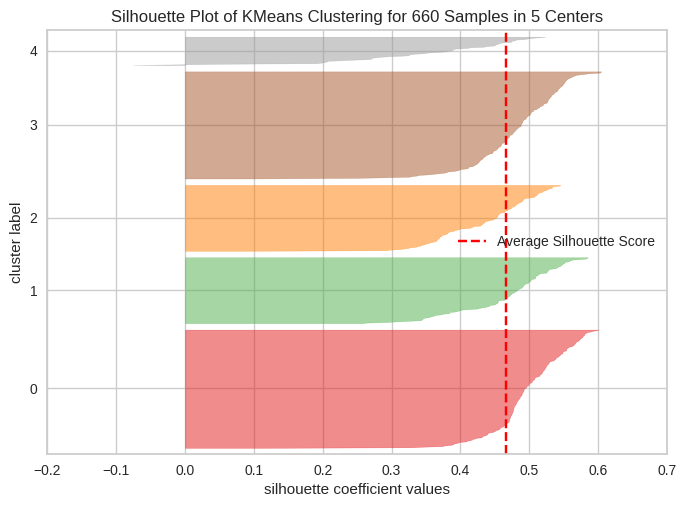

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

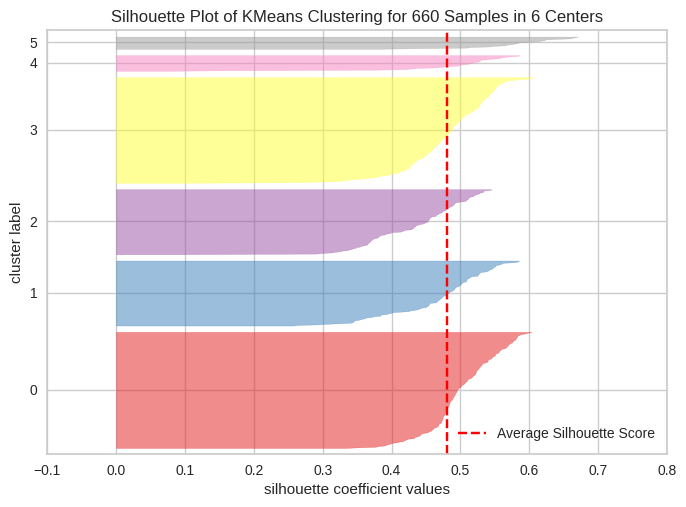

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

### Creating Final Model

In [49]:
# final K-means model
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [41]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [50]:
numeric_df1 = df1.select_dtypes(include='number')

km_cluster_profile = numeric_df1.groupby("KM_segments").mean()

In [51]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Customer Key"].count().values
)

In [44]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
KM_segments,,,,,,,,
0,398.815920,34427.875622,29273.631841,5.452736,3.502488,1.009950,2.000000,201
1,639.363636,43933.363636,142363.636364,8.727273,0.636364,8.272727,1.000000,22
2,113.008850,32825.415929,12761.061947,2.716814,0.911504,3.654867,6.752212,113
3,444.316940,77548.830601,38158.469945,5.590164,3.508197,0.945355,2.000000,183
4,117.911504,77320.389381,12902.654867,2.150442,0.946903,3.415929,6.902655,113
5,589.214286,66746.571429,140000.000000,8.750000,0.571429,12.964286,1.142857,28


In [52]:
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Avg_Credit_Limit"].unique())
    print()

In cluster 4, the following companies are present:
[100000  20000   5000  11000   6000  15000   8000  16000   9000  18000
  17000  19000  14000  12000   7000  13000  10000]

In cluster 2, the following companies are present:
[50000 30000 15000  3000 10000 13000  9000  8000 11000 19000  5000  6000
 16000 20000 18000 14000  7000 12000 17000]

In cluster 5, the following companies are present:
[100000 157000  94000 131000  96000 136000 121000 158000 108000 166000
 176000 178000  84000 200000 195000 173000 184000 123000  97000 127000
 171000 132000  95000 172000 167000]

In cluster 0, the following companies are present:
[10000  8000 17000 13000 16000 19000 20000  5000 11000  9000 18000  7000
 12000  6000 14000 15000 75000 56000 72000 50000 49000 40000 44000 46000
 74000 39000 52000 41000 59000 64000 45000 31000 66000 27000 51000 67000
 43000 36000 38000 48000 70000 37000 26000 47000 30000 28000 65000 35000
 29000 42000 33000 32000 62000 57000 71000 34000 60000 68000 69000 73000
 55000 630

In [53]:
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Customer Key"].unique())
    print()

In cluster 4, the following companies are present:
[87073 58634 82490 92503 68517 62617 96463 87241 61061 68067 65034 81130
 82164 61517 74126 83132 68502 99026 83326 62040 74625 60301 96386 78503
 68419 71632 81566 70248 91673 61355 60403 85868 76205 66524 69214 93482
 90168 71881 59656 99589 57990 79694 79403 59619 91099 74704 88338 92501
 96213 73007 97935 74795 73435 84069 83244 87291 98499 89007 93997 81116
 63663 69811 70199 61627 95507 53410 66200 58389 61347 59151 60475 95489
 77758 87471 85707 97951 97011 61009 63751 52758 78473 80457 59783 64241
 97536 98602 97687 55892 95495 86410 76718 98969 77143 63405 97463 98288
 69704 87350 56624 99596 72430 90958 67212 94251 61776 68003 79632 73811
 72892 96163 61234 55849 56156]

In cluster 2, the following companies are present:
[38414 17341 40496 37376 44770 52741 52326 25084 55196 39137 14309 29794
 30507 24001 14854 29112 13999 32550 28254 30888 46388 52142 37659 20119
 52363 50769 37252 51182 43886 32828 17937 29759 36929 21976 3

In [54]:
df1.groupby(["KM_segments", "Avg_Credit_Limit"])['Customer Key'].count()

KM_segments  Avg_Credit_Limit
0            5000                 5
             6000                 7
             7000                 5
             8000                11
             9000                 8
                                 ..
5            176000               1
             178000               1
             184000               1
             195000               2
             200000               1
Name: Customer Key, Length: 206, dtype: int64

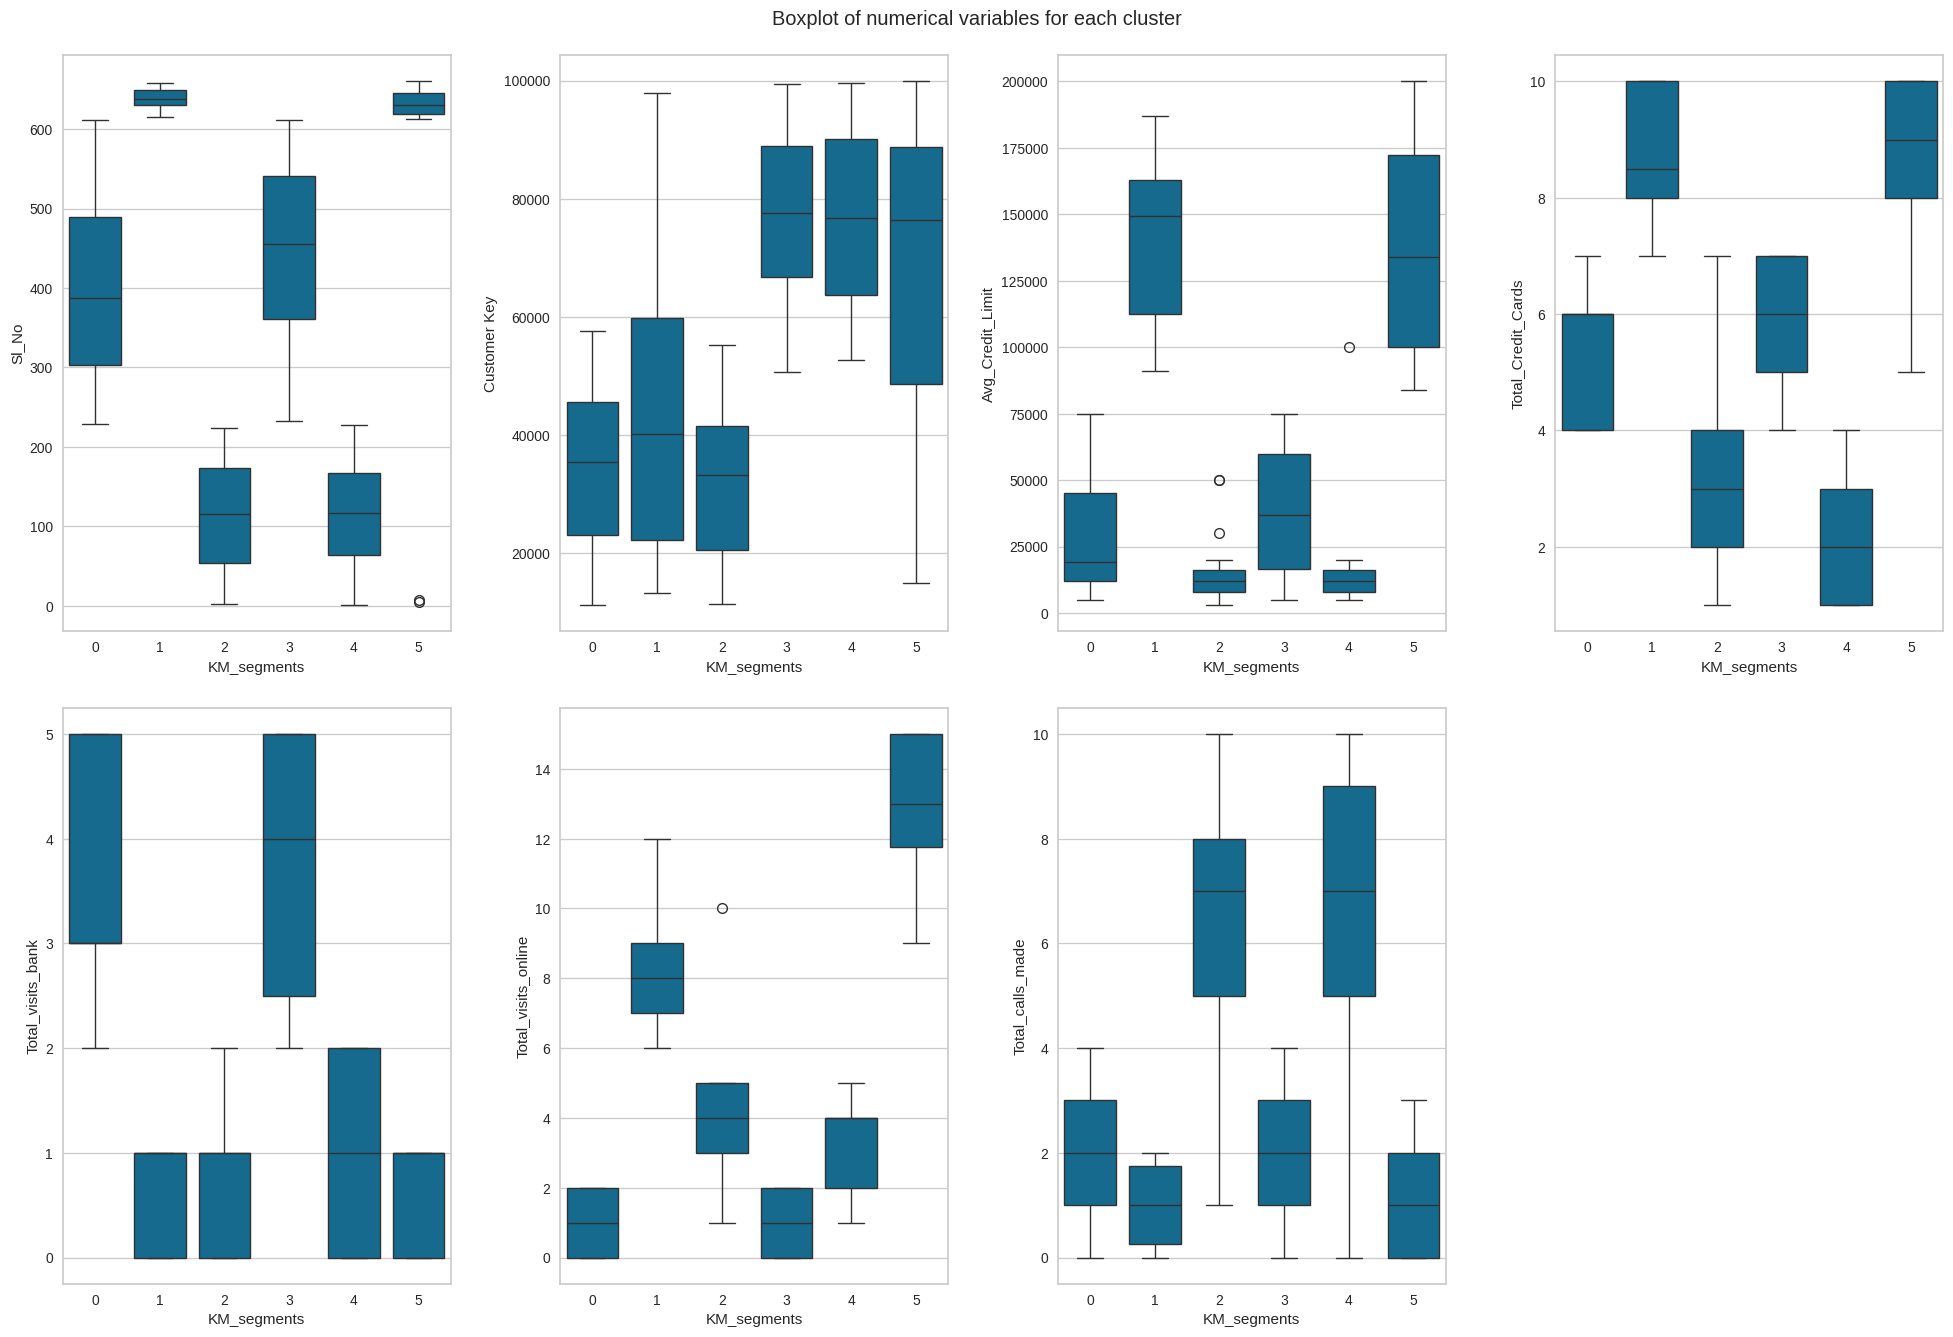

In [55]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [56]:
hc_df = subset_scaled_df.copy()

In [61]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.7323462986040292.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8568445411191499.
Cophenetic correlation for Euclidean distance and average linkage is 0.8795060897918682.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8765111391171589.
Cophenetic correlation for Chebyshev distance and single linkage is 0.6537418694697082.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7773049332049028.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8714548034461262.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8633150059751974.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.4714107136987136.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.513515150063651.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7589579900545415.
Cophenetic cor

**Let's explore different linkage methods with Euclidean distance only.**

In [60]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.7323462986040292.
Cophenetic correlation for complete linkage is 0.8568445411191499.
Cophenetic correlation for average linkage is 0.8795060897918682.
Cophenetic correlation for centroid linkage is 0.873983378961591.
Cophenetic correlation for ward linkage is 0.7221894654793625.
Cophenetic correlation for weighted linkage is 0.8765111391171589.
****************************************************************************************************
Highest cophenetic correlation is 0.8795060897918682, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

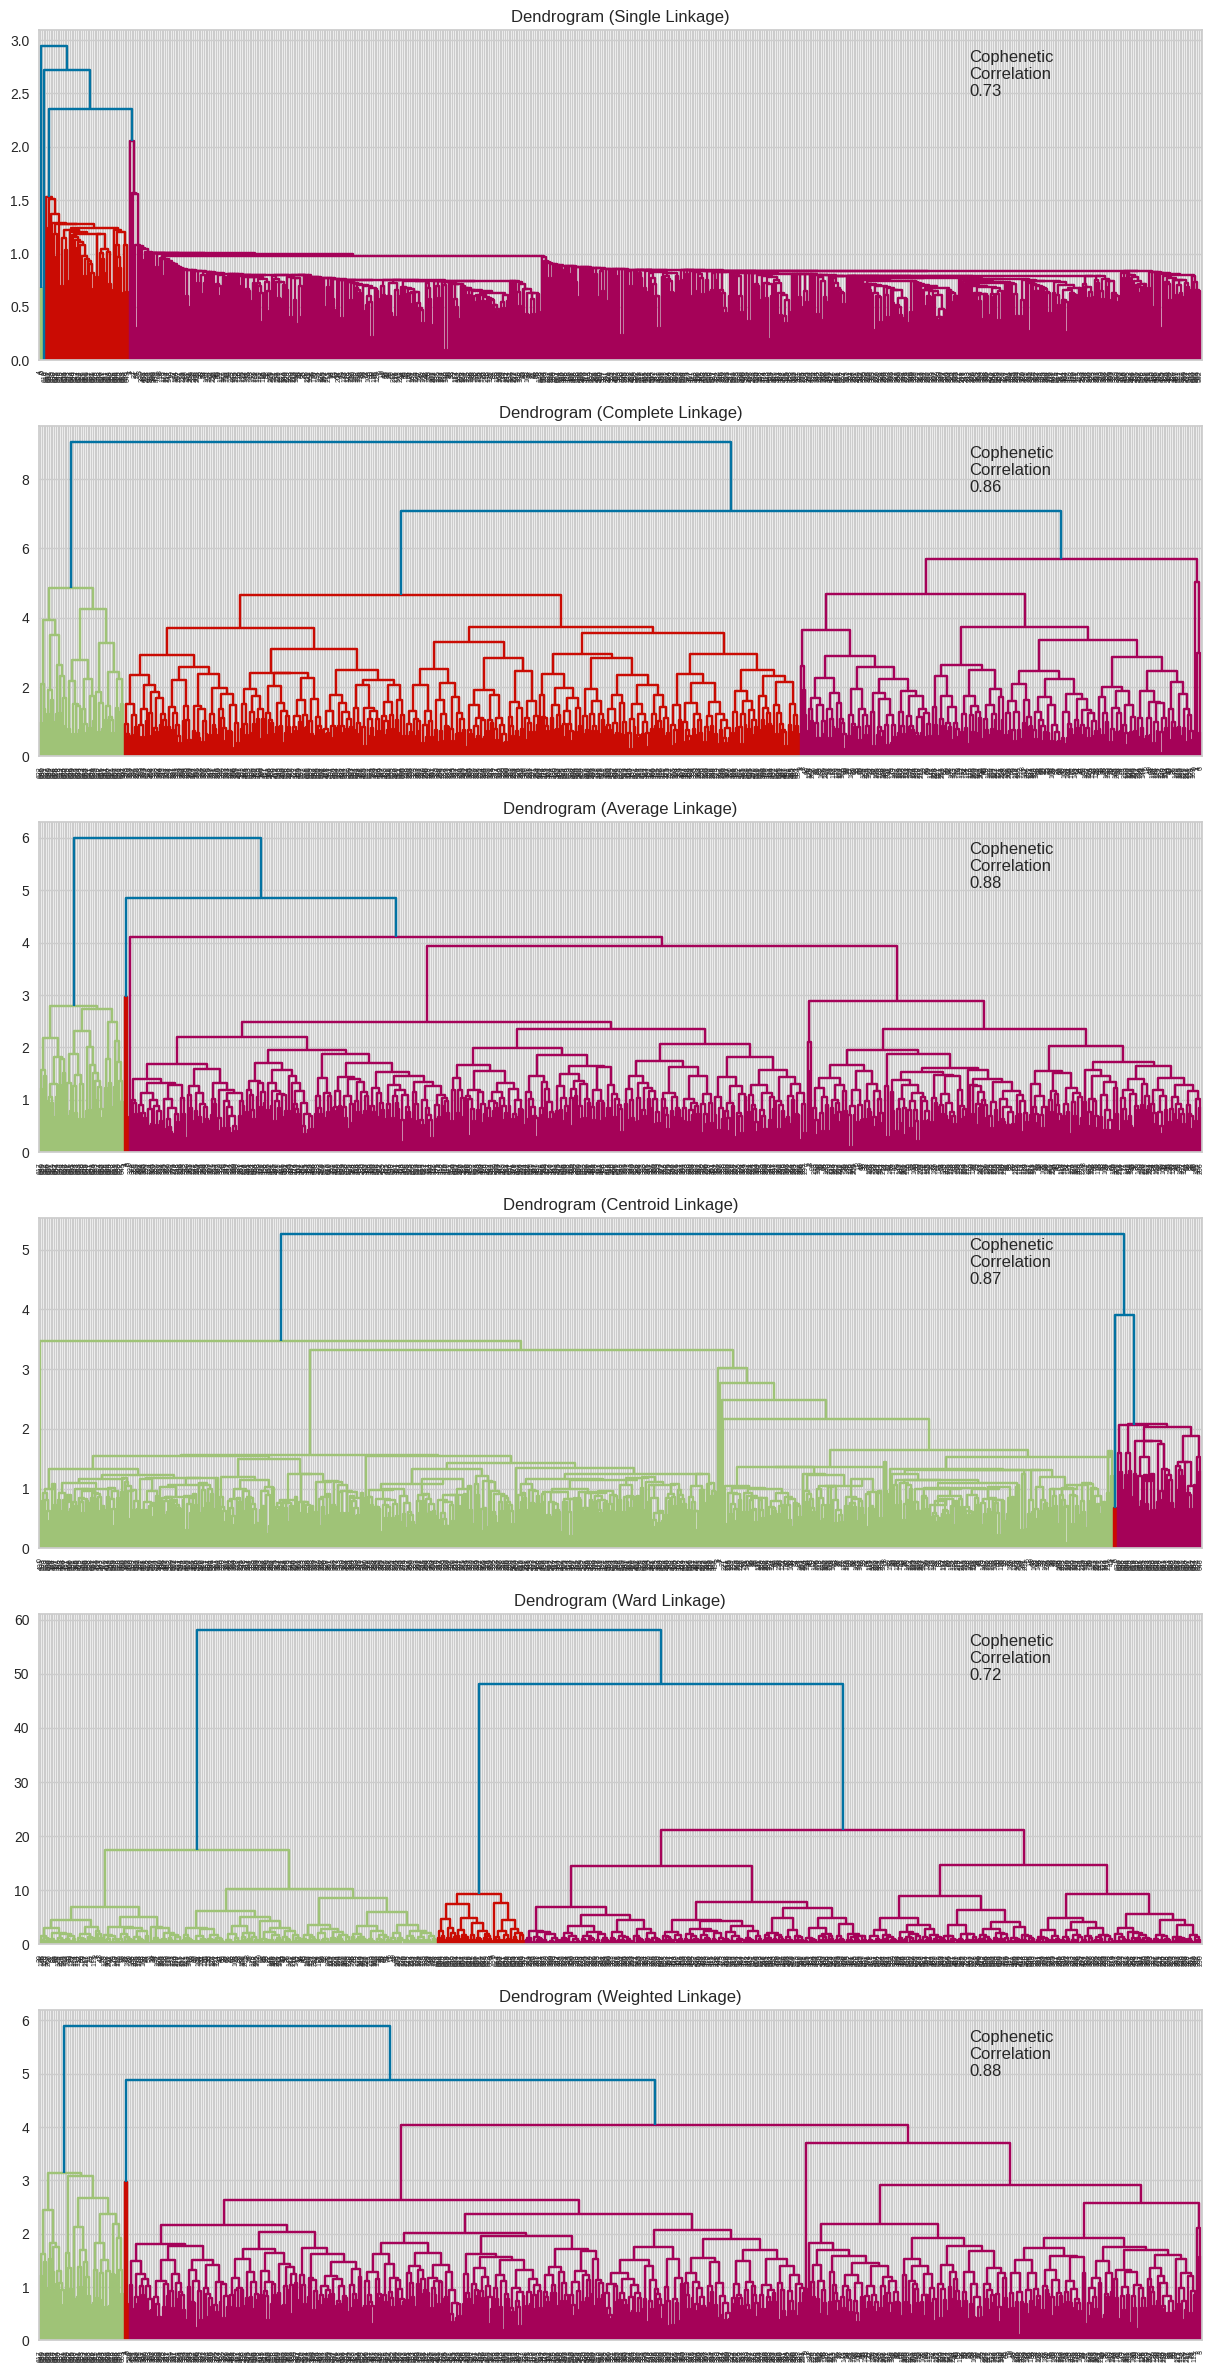

In [62]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [63]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.722189
0,single,0.732346
1,complete,0.856845
3,centroid,0.873983
5,weighted,0.876511
2,average,0.879506


### Creating model using sklearn

In [64]:
from sklearn.cluster import AgglomerativeClustering

In [65]:
# Define the hierarchical clustering model
HCmodel = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')

# Fit the model
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=6)

In [66]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [68]:
numeric_df2 = df2.select_dtypes(include=['number'])

hc_cluster_profile = numeric_df2.groupby("HC_segments").mean()

In [69]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Customer Key"].count().values
)

In [70]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,,,
0,422.113402,35927.891753,35108.247423,5.314433,3.489691,0.896907,2.144330,194
1,118.779310,70627.200000,12717.241379,2.331034,0.889655,3.441379,6.813793,145
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,319.670213,70456.648936,13000.000000,5.393617,3.340426,1.095745,1.797872,94
4,109.518519,27228.790123,13037.037037,2.617284,1.000000,3.703704,6.851852,81
5,515.968750,78317.739583,50354.166667,6.052083,3.697917,1.031250,1.906250,96


In [71]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Customer Key"].unique())
    print()

In cluster 1, the following companies are present:
[87073 58634 82490 44770 52741 52326 92503 68517 55196 62617 96463 87241
 61061 68067 65034 81130 82164 61517 30888 74126 83132 50769 68502 99026
 83326 62040 37252 74625 51182 60301 96386 43886 78503 68419 71632 81566
 70248 91673 61355 60403 85868 76205 66524 69214 33187 93482 90168 71881
 59656 99589 57990 79694 79403 47296 49198 59619 91099 74704 52736 88338
 92501 96213 73007 97935 74795 73435 41634 84069 83244 87291 98499 89007
 93997 81116 63663 69811 70199 49697 61627 45583 52750 95507 53410 53898
 66200 58389 61347 59151 37802 60475 95489 77758 87471 85707 97951 54785
 97011 61009 63751 52758 78473 80457 59783 64241 97536 33110 54281 98602
 97687 38261 37671 55892 95495 41946 86410 76718 98969 77143 53851 52783
 63405 48510 97463 98288 69704 87350 56624 99596 72430 90958 67212 44226
 94251 61776 55275 54477 68003 79632 73811 72892 51773 96163 61234 55849
 56156]

In cluster 4, the following companies are present:
[38414 17341 

In [72]:
df2.groupby(["HC_segments", "Avg_Credit_Limit"])['Customer Key'].count()

HC_segments  Avg_Credit_Limit
0            5000                3
             6000                4
             7000                2
             8000                8
             9000                7
                                ..
5            71000               3
             72000               1
             73000               1
             74000               1
             75000               1
Name: Customer Key, Length: 204, dtype: int64

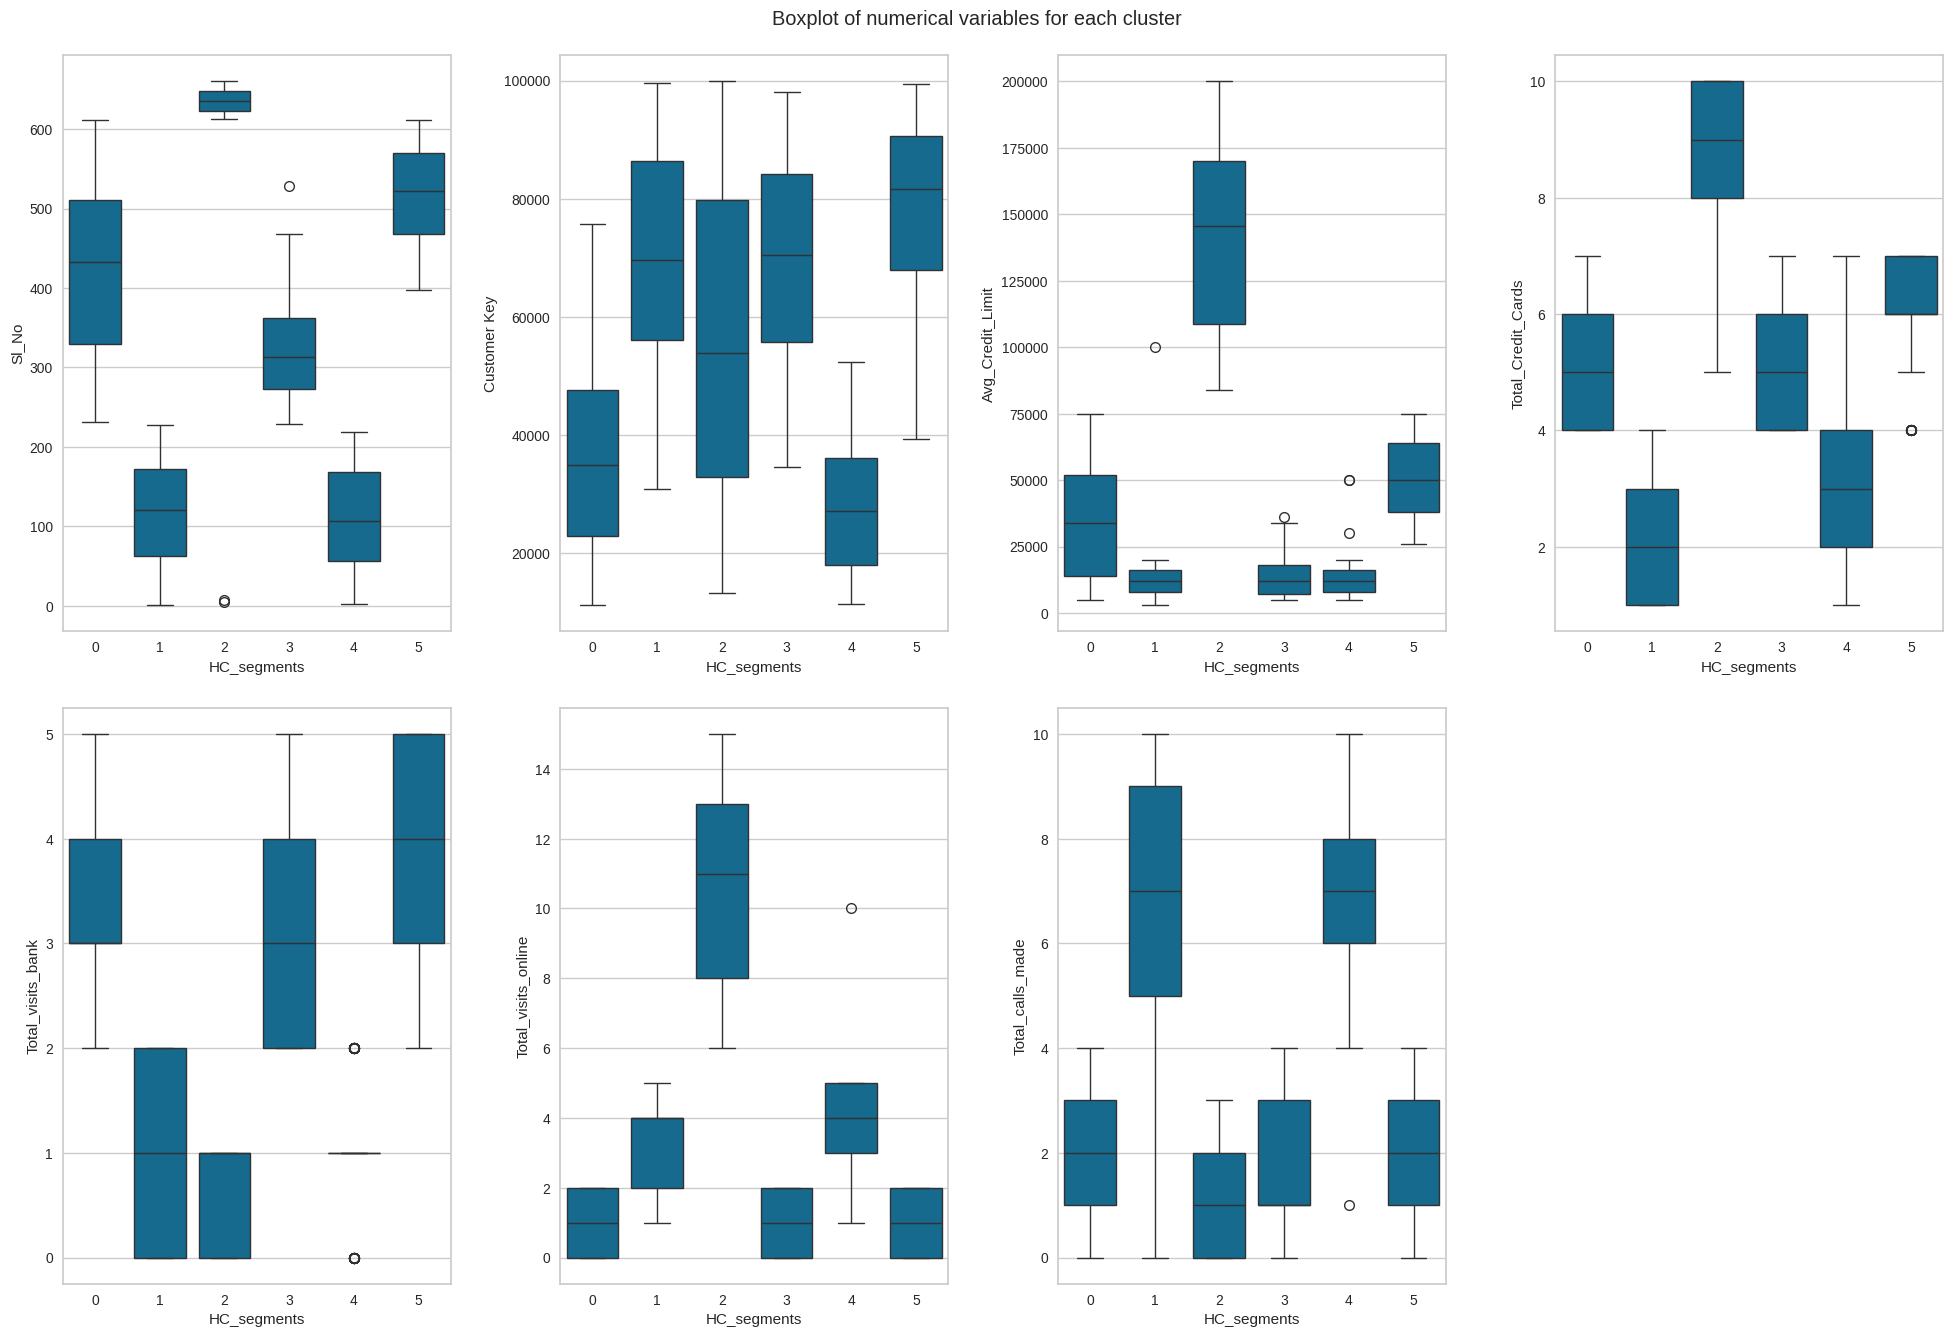

In [73]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

**K-means Clustering**

In [74]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
KM_segments,,,,,,,,
0,398.815920,34427.875622,29273.631841,5.452736,3.502488,1.009950,2.000000,201
1,639.363636,43933.363636,142363.636364,8.727273,0.636364,8.272727,1.000000,22
2,113.008850,32825.415929,12761.061947,2.716814,0.911504,3.654867,6.752212,113
3,444.316940,77548.830601,38158.469945,5.590164,3.508197,0.945355,2.000000,183
4,117.911504,77320.389381,12902.654867,2.150442,0.946903,3.415929,6.902655,113
5,589.214286,66746.571429,140000.000000,8.750000,0.571429,12.964286,1.142857,28


In [75]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Avg_Credit_Limit"].unique())
    print()

In cluster 4, the following companies are present:
[100000  20000   5000  11000   6000  15000   8000  16000   9000  18000
  17000  19000  14000  12000   7000  13000  10000]

In cluster 2, the following companies are present:
[50000 30000 15000  3000 10000 13000  9000  8000 11000 19000  5000  6000
 16000 20000 18000 14000  7000 12000 17000]

In cluster 5, the following companies are present:
[100000 157000  94000 131000  96000 136000 121000 158000 108000 166000
 176000 178000  84000 200000 195000 173000 184000 123000  97000 127000
 171000 132000  95000 172000 167000]

In cluster 0, the following companies are present:
[10000  8000 17000 13000 16000 19000 20000  5000 11000  9000 18000  7000
 12000  6000 14000 15000 75000 56000 72000 50000 49000 40000 44000 46000
 74000 39000 52000 41000 59000 64000 45000 31000 66000 27000 51000 67000
 43000 36000 38000 48000 70000 37000 26000 47000 30000 28000 65000 35000
 29000 42000 33000 32000 62000 57000 71000 34000 60000 68000 69000 73000
 55000 630

**Hierarchical Clustering**

In [76]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,,,
0,422.113402,35927.891753,35108.247423,5.314433,3.489691,0.896907,2.144330,194
1,118.779310,70627.200000,12717.241379,2.331034,0.889655,3.441379,6.813793,145
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,319.670213,70456.648936,13000.000000,5.393617,3.340426,1.095745,1.797872,94
4,109.518519,27228.790123,13037.037037,2.617284,1.000000,3.703704,6.851852,81
5,515.968750,78317.739583,50354.166667,6.052083,3.697917,1.031250,1.906250,96


In [77]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Avg_Credit_Limit"].unique())
    print()

In cluster 1, the following companies are present:
[100000  20000   5000   3000  10000  13000  11000   6000   8000  15000
  16000   9000  18000  19000  17000  14000  12000   7000]

In cluster 4, the following companies are present:
[50000 30000 15000  9000 11000 19000  5000  6000  8000 16000 13000 10000
 20000 18000 14000  7000 12000 17000]

In cluster 2, the following companies are present:
[100000 157000  94000 163000 131000  96000 136000 121000 158000 108000
 166000 176000 178000  91000 156000 146000  84000 155000 200000 195000
 187000 106000 114000 126000 173000 153000 184000 123000 144000  97000
  98000 127000 171000 186000 183000 111000 112000 132000  95000 172000
  99000 145000 167000]

In cluster 3, the following companies are present:
[10000  8000 19000 20000 13000 12000  5000  7000 18000 15000 14000 17000
 16000  6000 11000  9000 33000 25000 36000 34000]

In cluster 0, the following companies are present:
[17000 13000 16000  8000 19000 11000  9000 18000  7000 10000  6000 1500

In [78]:
from sklearn.datasets import make_blobs

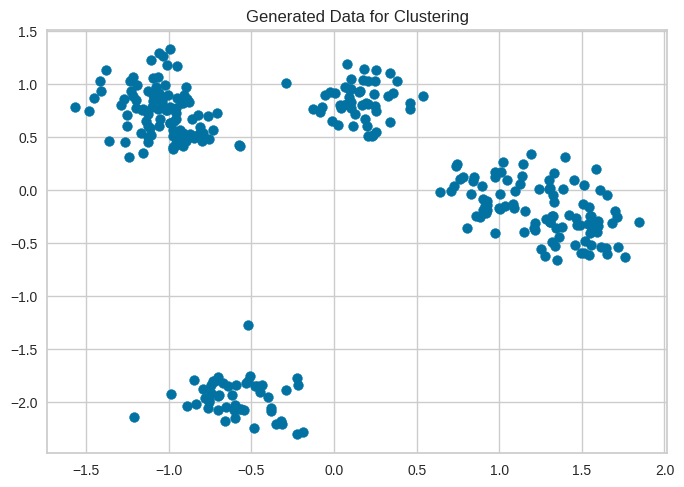

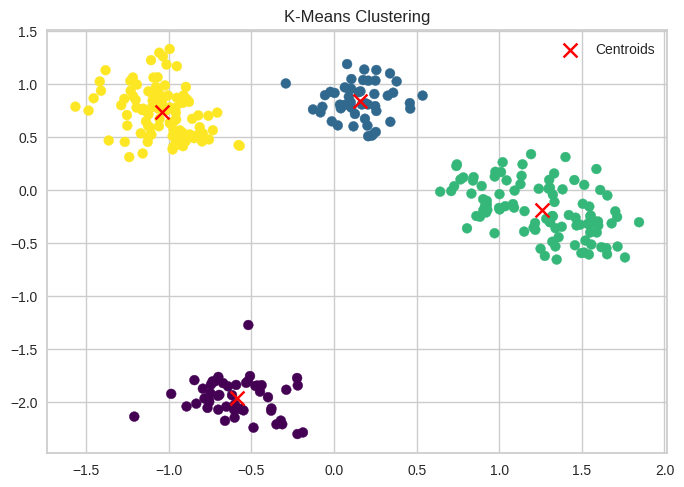

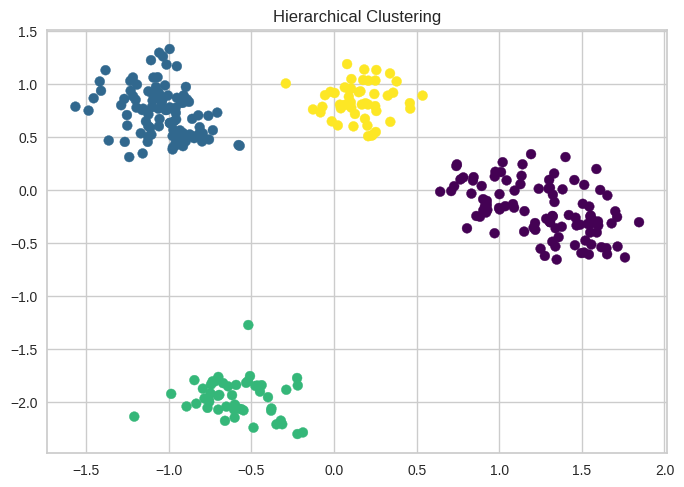

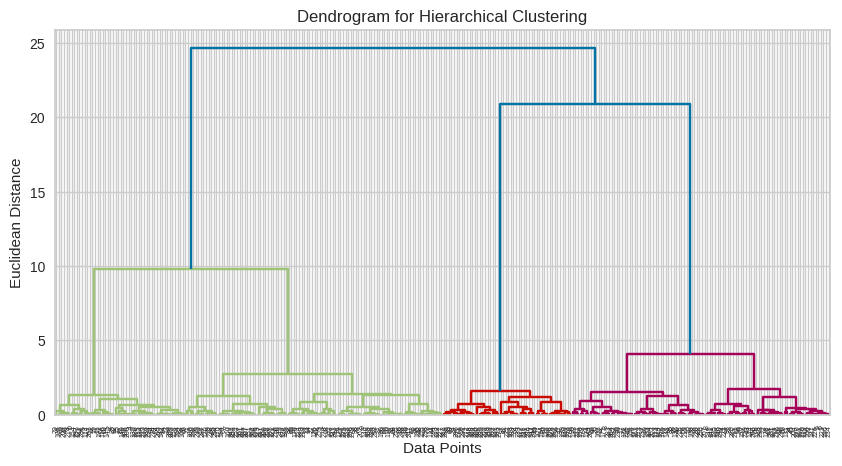

Silhouette Score for K-Means: 0.723
Silhouette Score for Hierarchical Clustering: 0.723

Comparison Table:

                           Aspect      K-Means  Hierarchical
0                      Requires k          Yes           Yes
1                  Algorithm Type  Partitional  Hierarchical
2                      Complexity        O(nk)         O(n²)
3  Handles Non-Spherical Clusters           No           Yes
4                   Visualization    Centroids    Dendrogram


In [79]:
# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=6, cluster_std=1.0, random_state=42)

# Standardize the data (important for clustering algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the dataset
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50)
plt.title("Generated Data for Clustering")
plt.show()

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply Hierarchical Clustering (Agglomerative)
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Visualize K-Means Clustering results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label="Centroids")
plt.title("K-Means Clustering")
plt.legend()
plt.show()

# Visualize Hierarchical Clustering results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='viridis', s=50)
plt.title("Hierarchical Clustering")
plt.show()

# Plot Dendrogram for Hierarchical Clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Compute and Compare Silhouette Scores
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)

print(f"Silhouette Score for K-Means: {kmeans_silhouette:.3f}")
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette:.3f}")

# Final Comparison Table
comparison = pd.DataFrame({
    "Aspect": ["Requires k", "Algorithm Type", "Complexity", "Handles Non-Spherical Clusters", "Visualization"],
    "K-Means": ["Yes", "Partitional", "O(nk)", "No", "Centroids"],
    "Hierarchical": ["Yes", "Hierarchical", "O(n²)", "Yes", "Dendrogram"]
})

print("\nComparison Table:\n")
print(comparison)